<a href="https://colab.research.google.com/github/Megacity1/DeepLearning-Challenge/blob/main/Copy_of_DeepLearning_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn import metrics   

from tensorflow.keras.layers import Dropout
import tensorflow as tf

In [75]:
#Complete description of the provided dataset


### **Dataset Description**
*   A1 - Number of times pregnant
*   A2 - Plasma glucose concentration a 2 hours in an
oral glucose tolerance test
*   A3 - Diastolic blood pressure (mm Hg)
*   A4 - Triceps skin fold thickness (mm)
*   A5 - 2-Hour serum insulin (mu U/ml)
*   A6 - Body mass index (weight in kg/(height in m)^2)
*   A7 - Diabetes pedigree function
*   A8 - Age (years)



In [76]:
#Import training data file


In [77]:
data = pd.read_csv('/content/train.csv')
data

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
663,664,9,145,80,46,130,37.9,0.637,40,1
664,665,6,115,60,39,0,33.7,0.245,40,1
665,666,1,112,80,45,132,34.8,0.217,24,0
666,667,4,145,82,18,0,32.5,0.235,70,1


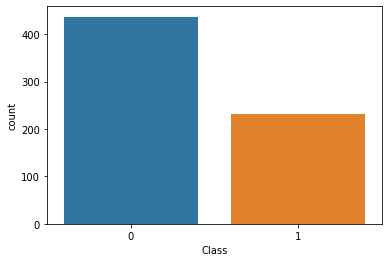

In [78]:
sns.countplot(x=data['Class'])

# **Splitting the datase**

In [79]:
# Extracting labels
ylabel = data['Class']
ylabel = pd.Series(ylabel)
print(ylabel.value_counts())

# Removing unnecessary columns in the bove data
Xlabel = data.drop(['Id', 'Class'], axis=1)
print(Xlabel.info())
Xlabel.head()

0    437
1    231
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      668 non-null    int64  
 1   A2      668 non-null    int64  
 2   A3      668 non-null    int64  
 3   A4      668 non-null    int64  
 4   A5      668 non-null    int64  
 5   A6      668 non-null    float64
 6   A7      668 non-null    float64
 7   A8      668 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB
None


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [80]:
# Spliting data into train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201


# Build the Model 

In [81]:
# define the keras model 
model1 = Sequential()
model1.add(Dense(units=60, input_dim=8, activation='relu'))
model1.add(Dense(units=32, activation='relu'))
#model1.add(Dense(units=50, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 60)                540       
                                                                 
 dense_19 (Dense)            (None, 32)                1952      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,525
Trainable params: 2,525
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Using keras model as a compiling
import tensorflow as tf
# create an optimiser object and set the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)


In [83]:
# Compile the model with the optimiser object
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [84]:
# training model
history = model1.fit(X_train1, y_train1, batch_size=10, epochs=50, validation_data=(X_val1, y_val1))



Epoch 1/50
47/47 [==============================] - 1s 7ms/step - loss: 3.0954 - accuracy: 0.5974 - val_loss: 2.3472 - val_accuracy: 0.3731
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 1.3104 - accuracy: 0.5889 - val_loss: 0.6568 - val_accuracy: 0.6617
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.7990 - accuracy: 0.6488 - val_loss: 0.7248 - val_accuracy: 0.6766
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6221 - accuracy: 0.6809 - val_loss: 0.5774 - val_accuracy: 0.7065
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.6724 - val_loss: 0.6234 - val_accuracy: 0.7015
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.6445 - val_loss: 0.6171 - val_accuracy: 0.7065
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6138 - accuracy: 0.6617 - val_loss: 0.6003 - val_accuracy: 0.7413
Epoch 8/50
47/47 [==

# Plotting the Graph

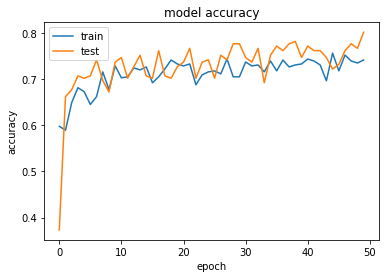

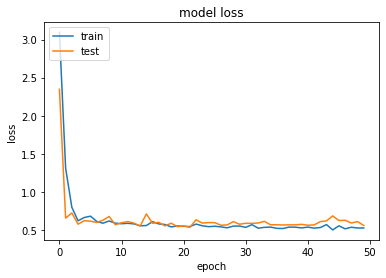

In [85]:
# A complete history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# A complete the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Validating the Model

In [86]:
# Getting model predictions
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

[[0.34266055]
 [0.46433553]
 [0.2768023 ]
 [0.3192685 ]
 [0.53130823]
 [0.01099241]
 [0.3625262 ]
 [0.24189904]
 [0.45339918]
 [0.14738244]]


In [87]:
# Making a categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [88]:
# Getting accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8009950248756219


# Doing Test Prediction

In [89]:
df_test = pd.read_csv('/content/test.csv')
df_test


,Id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47
...,...,...,...,...,...,...,...,...,...
95,96,10,101,76,48,180,32.9,0.171,63
96,97,2,122,70,27,0,36.8,0.340,27
97,98,5,121,72,23,112,26.2,0.245,30
98,99,1,126,60,0,0,30.1,0.349,47


In [90]:
# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['Id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [91]:
# create LabelEncoder for labels 
predictions = model1.predict(X_test)
print(predictions)

final_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
print(final_predictions)


[[0.4687451 ]
 [0.50112   ]
 [0.61926097]
 [0.3443526 ]
 [0.10184899]
 [0.31734958]
 [0.05315658]
 [0.91561794]
 [0.47173882]
 [0.30714458]
 [0.5950903 ]
 [0.27541065]
 [0.1208359 ]
 [0.7245457 ]
 [0.26044095]
 [0.46465012]
 [0.00298795]
 [0.37436152]
 [0.56383806]
 [0.48784715]
 [0.35816765]
 [0.48679605]
 [0.36610833]
 [0.63538647]
 [0.3158859 ]
 [0.483299  ]
 [0.26080388]
 [0.4324565 ]
 [0.5141525 ]
 [0.7610166 ]
 [0.27076042]
 [0.5436229 ]
 [0.36677772]
 [0.48849607]
 [0.7025756 ]
 [0.58506334]
 [0.2806369 ]
 [0.18745449]
 [0.02589849]
 [0.42881206]
 [0.80516326]
 [0.30979168]
 [0.36143678]
 [0.3614291 ]
 [0.7378228 ]
 [0.3281344 ]
 [0.27289027]
 [0.798251  ]
 [0.5701467 ]
 [0.24540848]
 [0.3888765 ]
 [0.3509744 ]
 [0.12720966]
 [0.37222767]
 [0.47302532]
 [0.30399814]
 [0.18547606]
 [0.3773478 ]
 [0.3339277 ]
 [0.39828777]
 [0.5062429 ]
 [0.3616102 ]
 [0.30480307]
 [0.32957697]
 [0.46074244]
 [0.36569566]
 [0.21666127]
 [0.37008464]
 [0.22859794]
 [0.21456778]
 [0.2961605 ]
 [0.32

In [92]:
df_submission = pd.DataFrame(df_test['Id'])
df_submission['Class'] = final_predictions

In [93]:
df_submission.to_csv('/content/test-predictions.csv', index=False)

In [94]:
Test_pred=pd.read_csv('/content/test-predictions.csv')
Test_pred

,Id,Class
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0
...,...,...
95,96,1
96,97,0
97,98,0
98,99,1


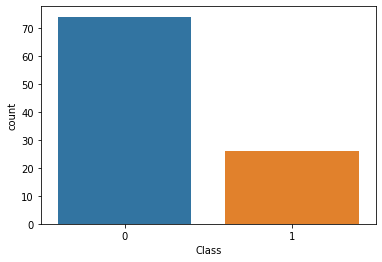

In [95]:
# Summarise class details
sns.countplot(x=Test_pred['Class'])

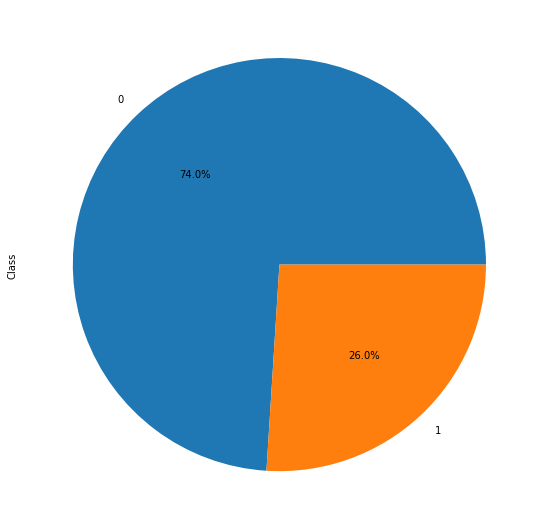

In [96]:
Test_pred["Class"].value_counts().plot(kind ="pie", autopct='%1.1f%%', figsize=(9.5,9.5));